In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

C:\Users\lamia\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
path = r"C:\Users\lamia\Downloads\dataset3-1 (1).csv"
df = pd.read_csv(path)

### Count the number of cows in the dataset

In [ ]:
num_cows = df['cow'].nunique()
print(f"Total number of unique cows: {num_cows}")

Total number of unique cows: 30


### Display the ids of cows

In [ ]:
unique_cow_ids = df['cow'].unique()
print("List of unique cow IDs:")
print(unique_cow_ids)  # Prints all IDs as an array

sorted_cow_ids = sorted(df['cow'].unique())
print("\nSorted list of cow IDs:")
print(sorted_cow_ids)

List of unique cow IDs:
[10127 10567  1565  1797  1919  2284  2340  2395  2399  2576  2581  2699
  4102  4262  4279  4372  4495  4716  5098  5104  5128  5394  5541  5810
  5896  8595  9481  9502  9601  9994]

Sorted list of cow IDs:
[1565, 1797, 1919, 2284, 2340, 2395, 2399, 2576, 2581, 2699, 4102, 4262, 4279, 4372, 4495, 4716, 5098, 5104, 5128, 5394, 5541, 5810, 5896, 8595, 9481, 9502, 9601, 9994, 10127, 10567]


### Detect outliers of features

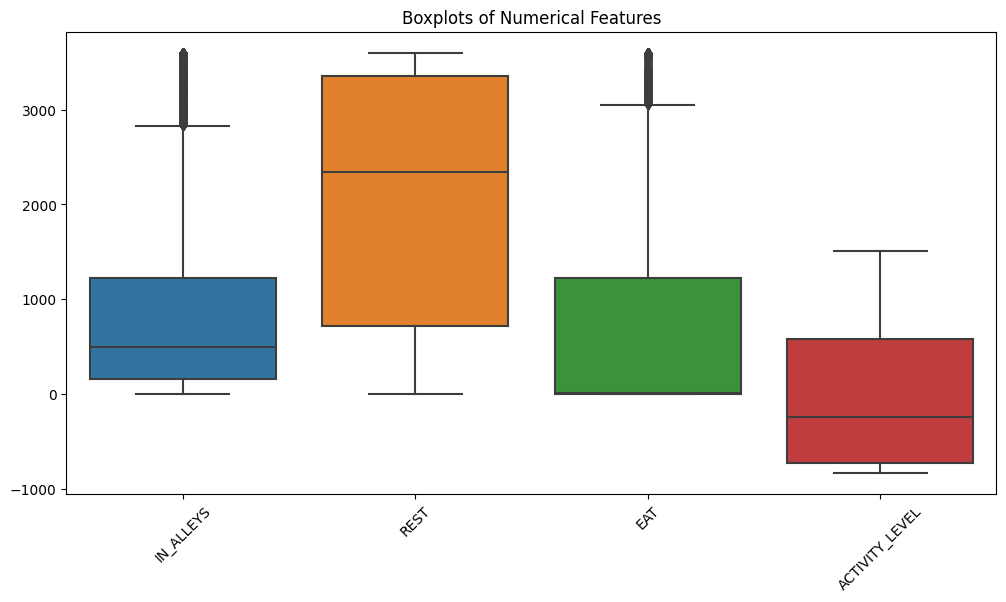

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier analysis
numerical_cols = ['IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL']

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate IQR for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")
    print(outliers[['cow', 'date', 'hour', col]].head())  # Show sample outliers


Outliers in IN_ALLEYS: 2003
      cow        date  hour  IN_ALLEYS
1   10127  2013-10-01     2   2931.783
36  10127  2013-10-02    13   3072.363
49  10127  2013-10-03     2   3017.512
73  10127  2013-10-04     2   3415.661
97  10127  2013-10-05     2   3163.810

Outliers in REST: 0
Empty DataFrame
Columns: [cow, date, hour, REST]
Index: []

Outliers in EAT: 918
      cow        date  hour       EAT
13  10127  2013-10-01    14  3411.150
26  10127  2013-10-02     3  3342.433
40  10127  2013-10-02    17  3155.483
62  10127  2013-10-03    15  3145.483
67  10127  2013-10-03    20  3226.188

Outliers in ACTIVITY_LEVEL: 0
Empty DataFrame
Columns: [cow, date, hour, ACTIVITY_LEVEL]
Index: []


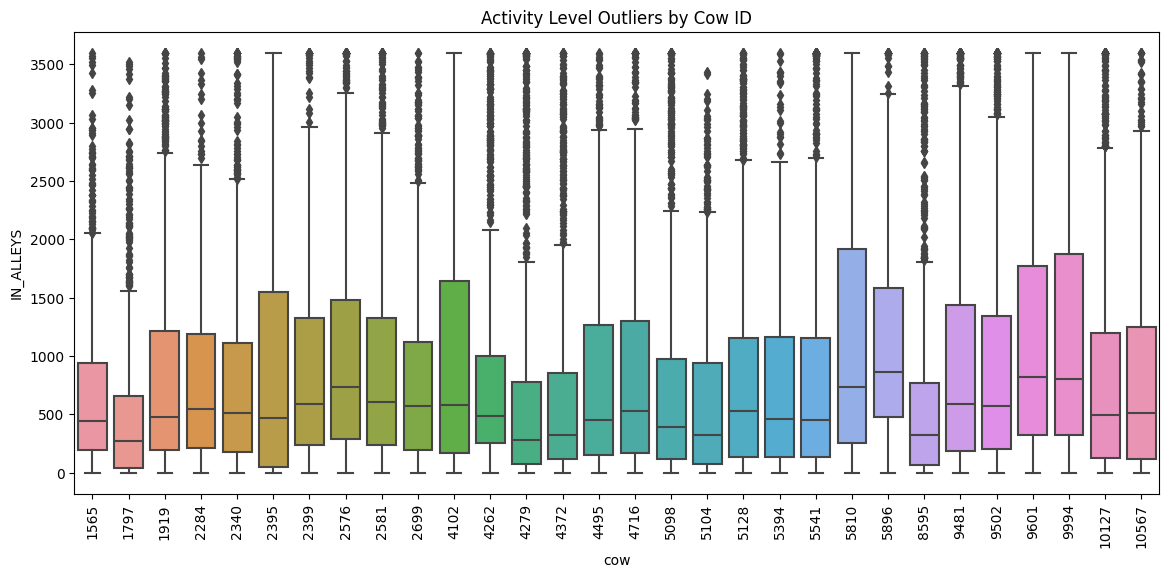

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='cow', y='IN_ALLEYS', data=df)
plt.title('Activity Level Outliers by Cow ID')
plt.xticks(rotation=90)
plt.show()

## Check missing days

### Check Date Range and Missing Dates

In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Get min/max dates
min_date = df['date'].min()
max_date = df['date'].max()
print(f"Date range: {min_date} to {max_date}")

# Generate all expected dates in the range
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
print(f"Total expected days: {len(all_dates)}")

# Check missing dates
missing_dates = all_dates.difference(df['date'].unique())
print(f"\nMissing dates {len(missing_dates)}:", ', '.join(missing_dates.strftime('%Y-%m-%d')))


Date range: 2013-10-01 00:00:00 to 2013-11-11 00:00:00
Total expected days: 42

Missing dates 0: 


### Check Completeness per Cow

In [ ]:
# Group by cow and count unique dates
cow_date_counts = df.groupby('cow')['date'].nunique()

# Compare against expected number of days
expected_days = len(all_dates)
missing_days_per_cow = expected_days - cow_date_counts

print("\nMissing days per cow:")
print(missing_days_per_cow[missing_days_per_cow > 0])


Missing days per cow:
cow
1565     20
1797      1
2284     32
2399     27
2581      2
4372      2
5098      1
5394      8
5896     29
9994     27
10127     2
10567    13
Name: date, dtype: int64


### The number of hourly entries per cow per day

In [ ]:
hourly_counts = df.groupby(['cow', 'date']).size().reset_index(name='hourly_records')
print(hourly_counts)

        cow       date  hourly_records
0      1565 2013-10-01              24
1      1565 2013-10-02              24
2      1565 2013-10-03              24
3      1565 2013-10-04              24
4      1565 2013-10-05              24
...     ...        ...             ...
1091  10567 2013-10-27              24
1092  10567 2013-10-28              24
1093  10567 2013-10-29              24
1094  10567 2013-10-30              24
1095  10567 2013-10-31              13

[1096 rows x 3 columns]


### Filter for days with exactly 24 hours records

In [ ]:
full_days = hourly_counts[hourly_counts['hourly_records'] == 24]
print(f"\nDays with full days of records: {len(full_days)}")


Days with full days of records: 1078


### The number of full 24-hour days per cow

In [ ]:
full_days_per_cow = full_days.groupby('cow').size().reset_index(name='full_24h_days')
print("\nFull 24h days per cow:", full_days_per_cow)


Full 24h days per cow:       cow  full_24h_days
0    1565             21
1    1797             41
2    1919             40
3    2284             10
4    2340             42
5    2395             42
6    2399             15
7    2576             42
8    2581             40
9    2699             42
10   4102             40
11   4262             40
12   4279             41
13   4372             38
14   4495             42
15   4716             42
16   5098             40
17   5104             41
18   5128             40
19   5394             32
20   5541             42
21   5810             42
22   5896             12
23   8595             42
24   9481             42
25   9502             42
26   9601             42
27   9994             15
28  10127             40
29  10567             28


In [ ]:
print(f"Percentage of complete days: {len(full_days)/len(hourly_counts)*100:.2f}%")

Percentage of complete days: 98.36%


### Count how many 24h samples have less than 12 observations

In [ ]:
less_than_12_obs = hourly_counts[hourly_counts['hourly_records'] < 12]
print(f"Number of cow-day combinations with less than 12 hourly records: {len(less_than_12_obs)}")

if len(less_than_12_obs) > 0:
    print(less_than_12_obs)



Number of cow-day combinations with less than 12 hourly records: 1
      cow       date  hourly_records
843  5896 2013-10-13               2


# We will execute this code on the dataset that has 24h with less than 12 observations

In [ ]:
df_filtered = df.copy()
if len(less_than_12_obs) > 0:
    #Filter for valid cow-date combinations (at least 12 hourly records)
    valid_days = hourly_counts[hourly_counts['hourly_records'] >= 12]

    #Merge back to original data to keep only valid records
    df_filtered = pd.merge(df, valid_days[['cow', 'date']], on=['cow', 'date'], how='inner')

    # df_filtered now excludes cow-date combos with <12 hours
    print(df_filtered)

         cow       date  hour  IN_ALLEYS      REST      EAT  ACTIVITY_LEVEL  \
0      10127 2013-10-01     1      0.000  3600.000    0.000      -828.00000   
1      10127 2013-10-01     2   2931.783   444.528  223.689       460.79322   
2      10127 2013-10-01     3    257.740  2930.966  411.294      -460.14030   
3      10127 2013-10-01     4     63.220  3536.780    0.000      -803.34420   
4      10127 2013-10-01     5      0.000  3600.000    0.000      -828.00000   
...      ...        ...   ...        ...       ...      ...             ...   
26218   9994 2013-11-11    20   2439.672   617.248  543.079       476.47366   
26219   9994 2013-11-11    21   1920.242  1432.293  247.464        81.74621   
26220   9994 2013-11-11    22   2084.508  1213.487  302.004       181.26095   
26221   9994 2013-11-11    23    643.668  2746.255  210.076      -440.41985   
26222   9994 2013-11-11    24    553.511  3046.488    0.000      -612.13048   

       oestrus  calving  lameness  mastitis  LPS  a

## Make One Hour Shift

In [ ]:
condition_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
                    'acidosis', 'other_disease', 'accidents', 'disturbance',
                    'mixing']

window_size = 24
shift = 1

grouped = df.sort_values(['cow', 'date', 'hour']).groupby('cow')
shifted_windows = []

for cow_id, group in grouped:
    activity = group['ACTIVITY_LEVEL'].values
    for i in range(0, len(activity) - window_size + 1, shift):
        window = activity[i:i + window_size]
        last_hour_index = i + window_size - 1
        if last_hour_index < len(group):
            conditions = group.iloc[last_hour_index][condition_columns].to_dict()
            shifted_windows.append({
                'cow': cow_id,
                'date': group.iloc[i]['date'],
                'start_hour': group.iloc[i]['hour'],
                'activity_window': window.tolist(),
                **conditions
            })

shifted_df = pd.DataFrame(shifted_windows)

print("\nDataFrame info:")
print(f"Total windows created: {len(shifted_df)}")
print("\nFirst 3 windows:")
display(shifted_df.head(3))
print("\nColumn details:")
display(shifted_df.info())



DataFrame info:
Total windows created: 25535

First 3 windows:


,cow,date,start_hour,activity_window,oestrus,calving,lameness,mastitis,LPS,acidosis,other_disease,accidents,disturbance,mixing
0,1565,2013-10-01,1,"[-387.22668, -828.0, -620.04849, 453.38179, 57...",0,0,0,0,NaN,NaN,0,0,0,0
1,1565,2013-10-01,2,"[-828.0, -620.04849, 453.38179, 576.0, 951.942...",0,0,0,0,NaN,NaN,0,0,0,0
2,1565,2013-10-01,3,"[-620.04849, 453.38179, 576.0, 951.9422, -659....",0,0,0,0,NaN,NaN,0,0,0,0



Column details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25535 entries, 0 to 25534
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cow              25535 non-null  int64         
 1   date             25535 non-null  datetime64[ns]
 2   start_hour       25535 non-null  int64         
 3   activity_window  25535 non-null  object        
 4   oestrus          25535 non-null  int64         
 5   calving          25535 non-null  int64         
 6   lameness         25535 non-null  int64         
 7   mastitis         25535 non-null  int64         
 8   LPS              0 non-null      float64       
 9   acidosis         0 non-null      float64       
 10  other_disease    25535 non-null  int64         
 11  accidents        25535 non-null  int64         
 12  disturbance      25535 non-null  int64         
 13  mixing           25535 non-null  int64         
dtypes: datetime64[ns](1),

None

### Calculate the 32 features

In [ ]:
import numpy as np
from scipy import stats, fft
import pandas as pd

def calculate_all_features(activity_windows):
    """
    Calculate all 32 features for each 24-hour activity window.
    Returns a DataFrame with one row per window and 32 feature columns.
    as in the doc paragraph 2.2 considering table 3
    """
    features = []

    for window in activity_windows:
        try:
            window = np.array(window)
            if len(window) != 24:
                raise ValueError("Window must contain exactly 24 hours of data")

            feature_dict = {}

            # =============================================
            # Time-Domain Features (1-17)
            # =============================================

            # Basic statistics (1-5)
            feature_dict['Minimum'] = np.min(window)
            feature_dict['Maximum'] = np.max(window)
            feature_dict['Mean'] = np.mean(window)
            feature_dict['RMS'] = np.sqrt(np.mean(np.square(window)))
            feature_dict['STD'] = np.std(window)

            # 6-hour window statistics (6-7)
            six_h_windows = [window[i*6:(i+1)*6] for i in range(4)]
            stds_6h = [np.std(w) for w in six_h_windows]
            means_6h = [np.mean(w) for w in six_h_windows]
            feature_dict['MeanSTD6h'] = np.mean(stds_6h)
            feature_dict['STDMean6h'] = np.std(means_6h)

            # Successive differences (9)
            diffs = np.diff(window)
            feature_dict['RMSSD'] = np.sqrt(np.mean(np.square(diffs)))

            # Distribution characteristics (10-17)
            feature_dict['Mode'] = stats.mode(window, keepdims=True)[0][0] if len(window) > 0 else np.nan
            feature_dict['Q10'] = np.percentile(window, 10)
            feature_dict['Q90'] = np.percentile(window, 90)
            feature_dict['Q25'] = np.percentile(window, 25)
            feature_dict['Q50'] = np.percentile(window, 50)
            feature_dict['Q75'] = np.percentile(window, 75)
            feature_dict['Skewness'] = stats.skew(window)
            feature_dict['Kurtosis'] = stats.kurtosis(window)

            # =============================================
            # Autocorrelation Features (18-28)
            # =============================================
            for lag in range(1, 12):
                if len(window) > lag:
                    corr = np.corrcoef(window[:-lag], window[lag:])[0,1]
                else:
                    corr = np.nan
                feature_dict[f'Autocorr{lag}'] = corr

            # =============================================
            # Frequency-Domain Features (29-32)
            # =============================================
            fft_result = np.abs(fft.fft(window))
            harmonics = fft_result[1:5]  # Skip 0-frequency, take harmonics 1-4
            for i, h in enumerate(harmonics, 1):
                feature_dict[f'h{i}'] = h

            features.append(feature_dict)

        except Exception as e:
            print(f"Error processing window: {e}")
            # Return NaN for all features if error occurs
            features.append({f: np.nan for f in FEATURE_NAMES})

    return pd.DataFrame(features)

FEATURE_NAMES = [
    # Time-Domain (1-17)
    'Minimum', 'Maximum', 'Mean', 'RMS', 'STD',
    'MeanSTD6h', 'STDMean6h', 'RMSSD', 'Mode',
    'Q10', 'Q90', 'Q25', 'Q50', 'Q75',
    'Skewness', 'Kurtosis',
    # Autocorrelation (18-28)
    *[f'Autocorr{i}' for i in range(1,12)],
    # Frequency-Domain (29-32)
    *[f'h{i}' for i in range(1,5)]
]

features_df = calculate_all_features(shifted_df['activity_window'])

# Combine with original df
final_df = pd.concat([shifted_df.reset_index(drop=True),
                     features_df[FEATURE_NAMES]], axis=1)

print("Feature calculation complete. Shape:", final_df.shape)
display(final_df[FEATURE_NAMES].head(3))

Feature calculation complete. Shape: (25535, 45)


,Minimum,Maximum,Mean,RMS,STD,MeanSTD6h,STDMean6h,RMSSD,Mode,Q10,...,Autocorr6,Autocorr7,Autocorr8,Autocorr9,Autocorr10,Autocorr11,h1,h2,h3,h4
0,-828.0,1412.17404,-193.869860,734.876162,708.842332,598.714610,275.706005,899.339147,-828.0,-824.881750,...,0.151619,0.190692,-0.008341,0.156770,0.056961,-0.192075,2226.686343,4369.358019,6621.015109,1946.468836
1,-828.0,1412.17404,-207.241797,744.775351,715.360861,683.752773,198.718268,894.966251,-828.0,-824.881750,...,0.072481,0.206264,0.009336,0.281243,0.085952,-0.101545,2341.385745,4677.507679,6809.627392,1984.248211
2,-828.0,1412.17404,-203.343851,740.675355,712.215739,622.535687,265.130740,893.932038,-828.0,-817.160115,...,-0.014553,0.130539,0.207801,0.282496,0.248442,-0.060675,2327.521030,4586.928892,6823.122923,1895.824696


### New dataset with one hour shift and the new 32 features

In [ ]:
from scipy import stats, fft

# 1. Define the feature calculation function (unchanged)
def calculate_features(window):
    """Calculate all 32 features for a 24-hour window"""
    features = {}
    window = np.array(window)

    # Time-Domain Features (1-17)
    features['Minimum'] = np.min(window)
    features['Maximum'] = np.max(window)
    features['Mean'] = np.mean(window)
    features['RMS'] = np.sqrt(np.mean(np.square(window)))
    features['STD'] = np.std(window)

    # 6-hour window statistics
    six_h_windows = [window[i*6:(i+1)*6] for i in range(4)]
    stds_6h = [np.std(w) for w in six_h_windows]
    means_6h = [np.mean(w) for w in six_h_windows]
    features['MeanSTD6h'] = np.mean(stds_6h)
    features['STDMean6h'] = np.std(means_6h)

    # Successive differences
    diffs = np.diff(window)
    features['RMSSD'] = np.sqrt(np.mean(np.square(diffs)))

    # Quantiles and distribution shape
    try:
        features['Mode'] = stats.mode(window, keepdims=True)[0][0]
    except:
        features['Mode'] = window[0]

    for p in [10, 25, 50, 75, 90]:
        features[f'Q{p}'] = np.percentile(window, p)
    features['Skewness'] = stats.skew(window)
    features['Kurtosis'] = stats.kurtosis(window)

    # Autocorrelations (18-28)
    for lag in range(1, 12):
        if len(window) > lag:
            corr = np.corrcoef(window[:-lag], window[lag:])[0,1]
        else:
            corr = np.nan
        features[f'Autocorr{lag}'] = corr

    # Frequency-Domain Features (29-32)
    fft_values = np.abs(fft.fft(window))[1:5]  # Harmonics 1-4
    for i, h in enumerate(fft_values, 1):
        features[f'h{i}'] = h

    return features

# 2. Create 1-hour shifted windows (updated to exclude unwanted columns)
def create_shifted_windows(df, window_size=24, shift=1):
    """Generate overlapping 24-hour windows with 1-hour shift"""
    shifted_data = []

    # Define condition columns (excluding management_changes and OK)
    condition_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
                        'acidosis', 'other_disease', 'accidents', 'disturbance',
                        'mixing']

    # Group by cow only (not date) for continuous windows
    for cow_id, group in df.sort_values(['cow', 'date', 'hour']).groupby('cow'):
        activity = group['ACTIVITY_LEVEL'].values
        dates = group['date'].values
        hours = group['hour'].values

        # Generate all possible windows
        for i in range(0, len(activity) - window_size + 1, shift):
            window = activity[i:i + window_size]
            conditions = group.iloc[i + window_size - 1][condition_columns].to_dict()

            shifted_data.append({
                'cow': cow_id,
                'start_date': dates[i],
                'start_hour': hours[i],
                'activity_window': window.tolist(),
                **conditions
            })

    return pd.DataFrame(shifted_data)

# 3. Process your data
print("Creating 1-hour shifted windows (excluding management_changes and OK)...")
shifted_df = create_shifted_windows(df)

print("Calculating features for each window...")
feature_data = [calculate_features(w) for w in shifted_df['activity_window']]
features_df = pd.DataFrame(feature_data)

# 4. Combine into final dataset
final_df = pd.concat([
    shifted_df.drop(columns=['activity_window']),  # Keep only metadata and conditions
    features_df
], axis=1)

# 5. Save the results
output_path = "cow_activity_features_1hour_shift_clean.csv"
final_df.to_csv(output_path, index=False)

print(f"\nProcessing complete! Results saved to {output_path}")
print(f"Final dataset shape: {final_df.shape}")
print("\nFirst 3 rows of the final dataset:")
display(final_df.head(3))

Creating 1-hour shifted windows (excluding management_changes and OK)...
Calculating features for each window...

Processing complete! Results saved to cow_activity_features_1hour_shift_clean.csv
Final dataset shape: (25535, 44)

First 3 rows of the final dataset:


,cow,start_date,start_hour,oestrus,calving,lameness,mastitis,LPS,acidosis,other_disease,...,Autocorr6,Autocorr7,Autocorr8,Autocorr9,Autocorr10,Autocorr11,h1,h2,h3,h4
0,1565,2013-10-01,1,0,0,0,0,NaN,NaN,0,...,0.151619,0.190692,-0.008341,0.156770,0.056961,-0.192075,2226.686343,4369.358019,6621.015109,1946.468836
1,1565,2013-10-01,2,0,0,0,0,NaN,NaN,0,...,0.072481,0.206264,0.009336,0.281243,0.085952,-0.101545,2341.385745,4677.507679,6809.627392,1984.248211
2,1565,2013-10-01,3,0,0,0,0,NaN,NaN,0,...,-0.014553,0.130539,0.207801,0.282496,0.248442,-0.060675,2327.521030,4586.928892,6823.122923,1895.824696


### Compute additional statistical metrics

In [ ]:
daily_df = df_filtered.groupby(['cow', 'date']).agg({
    'IN_ALLEYS': 'sum',
    'REST': 'sum',
    'EAT': 'sum',
    'ACTIVITY_LEVEL': 'sum'
}).reset_index()


def rmse(x):
    return np.sqrt(np.mean(x**2))

#Compute statistical metrics per cow
stats_df = daily_df.groupby('cow').agg(
    min_IN_ALLEYS=('IN_ALLEYS', 'min'),
    std_IN_ALLEYS=('IN_ALLEYS', 'std'),
    quantile25_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.25)),
    quantile50_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.5)),
    quantile75_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.75)),
    rmse_IN_ALLEYS=('IN_ALLEYS', rmse),

    min_REST=('REST', 'min'),
    std_REST=('REST', 'std'),
    quantile25_REST=('REST', lambda x: x.quantile(0.25)),
    quantile50_REST=('REST', lambda x: x.quantile(0.5)),
    quantile75_REST=('REST', lambda x: x.quantile(0.75)),
    rmse_REST=('REST', rmse),

    min_EAT=('EAT', 'min'),
    std_EAT=('EAT', 'std'),
    quantile25_EAT=('EAT', lambda x: x.quantile(0.25)),
    quantile50_EAT=('EAT', lambda x: x.quantile(0.5)),
    quantile75_EAT=('EAT', lambda x: x.quantile(0.75)),
    rmse_EAT=('EAT', rmse),

    min_ACTIVITY=('ACTIVITY_LEVEL', 'min'),
    std_ACTIVITY=('ACTIVITY_LEVEL', 'std'),
    quantile25_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.25)),
    quantile50_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.5)),
    quantile75_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.75)),
    rmse_ACTIVITY=('ACTIVITY_LEVEL', rmse)
).reset_index()


print(stats_df)

      cow  min_IN_ALLEYS  std_IN_ALLEYS  quantile25_IN_ALLEYS  \
0    1565      10891.079    3509.863551           16201.37700   
1    1797       5840.269    4792.309095            9011.90700   
2    1919      12851.792    4373.463702           17913.80350   
3    2284      13250.940    5818.705454           17024.34475   
4    2340       8970.482    4853.660022           15485.72100   
5    2395      10432.839   10507.209206           17934.64750   
6    2399      14567.283    6168.327661           18111.58000   
7    2576      15196.208    8175.486927           21227.16225   
8    2581      13817.151    6804.886673           17441.57300   
9    2699      11294.179    4874.658852           15787.16525   
10   4102      16233.750    4418.806424           20480.20350   
11   4262      16215.110    2816.757500           18621.72175   
12   4279      12699.910    3431.487792           14271.16725   
13   4372      13193.189    2613.830946           15699.07600   
14   4495      10325.397 